### Import packages

In [6]:
import pandas as pd; import os; from analysis_helpers import *; import warnings
from analysis_helpers import *
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np
from scipy.interpolate import pchip
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
import pingouin

### Load data

In [1]:
b     = pd.read_csv('behavioral.csv') 
d_nov = pd.read_csv('d_nov_b.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Add last-cued category to memory trials

In [2]:
for idx,x in b[(b['Trial']==9)&(b['Trial Type']=='Presentation')].iterrows():
    b.loc[(b['UniqueID']==x['UniqueID']) &
         (b['Run']==x['Run'])
         &(b['Trial Type']=='Memory'),'Cued Category'] = x['Cued Category']

In [3]:
b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Cued_Cat'
b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Cued_Cat'
b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Uncued_Cat'
b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Uncued_Cat'  

### Separate behavioral and variable

In [43]:
bvar = b[(b['UniqueID']>=30)] 
bsus = b[(b['UniqueID']<=29)] 

### All images, Variable --> significant effect of Category, Attention Level, and interaction

In [34]:
# Variable Attention

# groupby subject, attention level, category
bot = bvar.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# repeated measures anova --> familiarity_rating ~ category * attention_level
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                  data=bot)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,3.458,1,22,3.458,10.893,3.258622e-03,3.258622e-03,0.331,1.000
1,Attention Level,13.437,5,110,2.687,27.730,4.463426e-18,8.250565e-09,0.558,0.418
2,Category * Attention Level,1.500,5,110,0.300,8.183,1.344844e-06,6.410325e-05,0.271,0.644


### Follow up t-test (scene / face)

In [39]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot).head(n=1)

,Contrast,Category,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,-,Face,Place,True,True,-6.057,136.0,two-sided,1.278449e-08,8.015e+05,0.617,-0.477


### Novel images, Variable --> Trending towards sig diff between categories (not attention level)

In [40]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Contrast,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,Face,Place,True,True,-1.738,44.0,two-sided,0.089227,0.645,0.57,-0.237


### All images, Sustained --> significant effect of Category, Attention Level, and interaction

In [48]:
# # Sustained Attention

# # groupby subject, attention level, category
# bot = bsus.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# # repeated measures anova --> familiarity_rating ~ category * attention_level
# pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
#                   data=bot)

In [47]:
# ts = pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID',data=bot)
# ts[ts['p-unc']<.05]

### Novel images, Sustained --> Significant diff for attention level, and interaction, but not category alone

In [46]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,0.020,1,29,0.020,0.236,0.630528,0.630528,0.008,1.0
1,Attention Level,2.218,1,29,2.218,19.063,0.000147,0.000147,0.397,1.0
2,Category * Attention Level,0.108,1,29,0.108,5.717,0.023512,0.023512,0.165,1.0


In [49]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])


,Contrast,Category,A,B,Paired,Parametric,T,dof,tail,p-unc,BF10,CLES,hedges
0,Category,-,Face,Place,True,True,0.615,59.0,two-sided,5.406769e-01,0.169,0.507,0.051
1,Attention Level,-,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,5.699,59.0,two-sided,4.058750e-07,3.682e+04,0.649,0.564
2,Category * Attention Level,Face,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,5.240,29.0,two-sided,1.302390e-05,1657.805,0.669,0.661
3,Category * Attention Level,Place,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,2.997,29.0,two-sided,5.546098e-03,7.444,0.623,0.449


<hr>

# Behavioral recap

In both experiments, category, attention level, and interaction all influence familiarity.

#### Within novel images:

<b>variable:</b> only category has an influence.

<b>sustained:</b> only attention level and interaction have an influence?

<hr>

# Pupil data

In [20]:
d_nov['Experiment'] = np.nan
d_nov.loc[d_nov['UniqueID']<=29, 'Experiment'] = 'Sustained'
d_nov.loc[d_nov['UniqueID']>=30, 'Experiment'] = 'Variable'

### Plot all new images, grouped by experiment

Variable


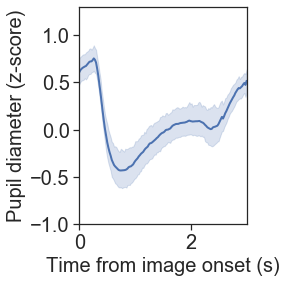

Sustained


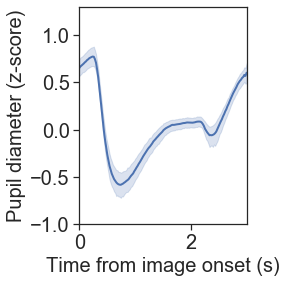

In [21]:
attn_group = d_nov.groupby(['Experiment','UniqueID','Time','Attention Level'], as_index=False).mean()

for e in ['Variable', 'Sustained']:
 
    #for level in ['Place','Face']:

    plt.figure(figsize=(3, 4));  #;print(level)

    sb.lineplot(x='Time', y='Interp', #hue='Familiarity Instruction', 
                data=attn_group[(attn_group['Experiment']==e)
                               &(attn_group['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))].groupby(['UniqueID','Time'], as_index=False).mean(), 
                linewidth = 2, palette="RdBu")

    plt.xlim((0 , 3)); plt.ylim((-1, 1.3)); plt.tick_params(labelsize=20)
    plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)


    name = e+'_all.pdf'
    #plt.savefig(name)
    print(e)
    plt.show()

### Plot all new images, both exps, grouped by rating and category

Variable
Place


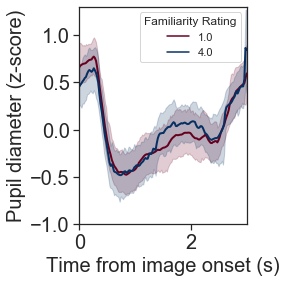

Variable
Face


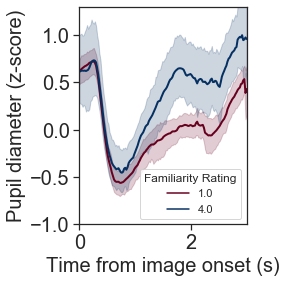

Sustained
Place


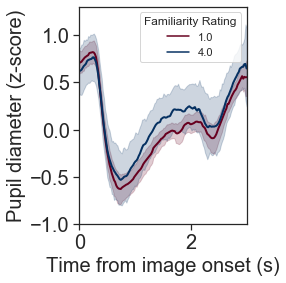

Sustained
Face


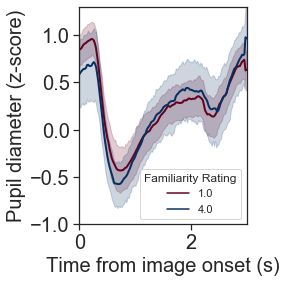

In [24]:
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity Rating','Time','Category'], as_index=False).mean()

for e in ['Variable', 'Sustained']:
 
    for level in ['Place','Face']:

        plt.figure(figsize=(3, 4)); print(e);print(level)
 
        sb.lineplot(x='Time', y='Interp', hue='Familiarity Rating', 
                    data=attn_group[(attn_group['Experiment']==e)&(attn_group['Category'] == level)
                                   &(attn_group['Familiarity Rating'].isin([1,4]))], 
                    linewidth = 2, palette="RdBu")
                
        plt.xlim((0 , 3)); plt.ylim((-1, 1.3)); plt.tick_params(labelsize=20)
        plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
        
        name = e+'_'+level+'.pdf'
        # plt.savefig(name)
        plt.show()

### Sustained Attention plots, split by rating, category, and attention cue

Sustained
Novel_Cued_Cat
Place


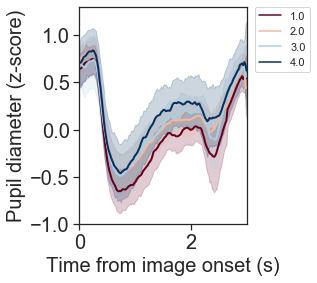

Sustained
Novel_Uncued_Cat
Place


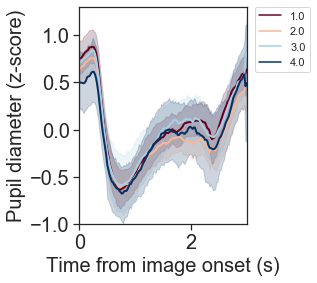

Sustained
Novel_Cued_Cat
Face


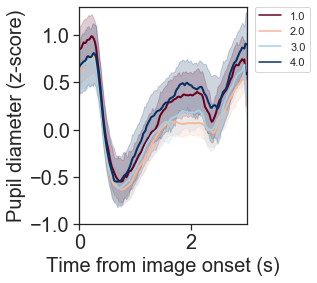

Sustained
Novel_Uncued_Cat
Face


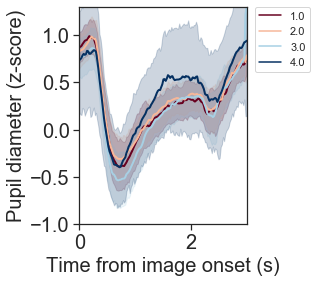

In [50]:
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity Rating','Time','Category','Attention Level'], as_index=False).mean()

for e in ['Sustained']:
 
    for level in ['Place','Face']:
        for c in ['Novel_Cued_Cat','Novel_Uncued_Cat']:
            
            missing_subs = []

            plt.figure(figsize=(3, 4)); print(e);print(c);print(level)

            sb.lineplot(x='Time', y='Interp', hue='Familiarity Rating', 
                        data=attn_group[(attn_group['Experiment']==e)&(attn_group['Category'] == level)
                                       &(attn_group['Attention Level']==c)], 
                        linewidth = 2, palette="RdBu")

            plt.xlim((0 , 3)); plt.ylim((-1, 1.3)); plt.tick_params(labelsize=20)
            plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)

            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            fig_name = e+'_'+level+'_'+c+'.pdf'

            # plt.savefig(fig_name)
            plt.show()

### Organize gaze data for analysis 

In [51]:
var_lme = d_nov[d_nov['Experiment']=='Variable'].groupby(['UniqueID', 'Category','Familiarity Rating','Time'], as_index=False).mean()
var_lme = var_lme.groupby(['UniqueID', 'Category','Familiarity Rating'], as_index=False).mean()
var_lme['FA'] = var_lme['Familiarity Rating']

sus_lme = d_nov[d_nov['Experiment']=='Sustained'].groupby(['UniqueID', 'Category','Attention Level','Familiarity Rating','Time'], as_index=False).mean()
sus_lme = sus_lme.groupby(['UniqueID', 'Category','Attention Level','Familiarity Rating'], as_index=False).mean()
sus_lme['FA'] = sus_lme['Familiarity Rating']
sus_lme['AT'] = sus_lme['Attention Level']

In [63]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Variable Attention, liner mixed model (using R)

In [103]:
%R -i var_lme

In [130]:
%%R
library(pacman)
pacman::p_load(lme4, lmerTest, emmeans)

In [132]:
%%R 
var_model    <- lmer(Interp~Category*FA+(1|UniqueID), data=var_lme)
var_anova    <- anova(var_model)
var_anova

Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Category    0.07997 0.07997     1 132.94  0.5277 0.46885  
FA          0.39830 0.39830     1 132.03  2.6285 0.10735  
Category:FA 0.46651 0.46651     1 133.01  3.0787 0.08163 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Variable Attention, post-hoc

In [133]:
%%R
summary(var_model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Interp ~ Category * FA + (1 | UniqueID)
   Data: var_lme

REML criterion at convergence: 193.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0738 -0.5787 -0.0854  0.4583  4.4701 

Random effects:
 Groups   Name        Variance Std.Dev.
 UniqueID (Intercept) 0.03459  0.1860  
 Residual             0.15153  0.3893  
Number of obs: 166, groups:  UniqueID, 23

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)       -0.07925    0.11490 154.06587  -0.690   0.4914  
CategoryPlace      0.10885    0.14983 132.93558   0.726   0.4688  
FA                 0.09246    0.03940 132.31359   2.347   0.0204 *
CategoryPlace:FA  -0.09617    0.05481 133.00853  -1.755   0.0816 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) CtgryP FA    
CategoryPlc -0.676              
FA          -0

### Plot residuals

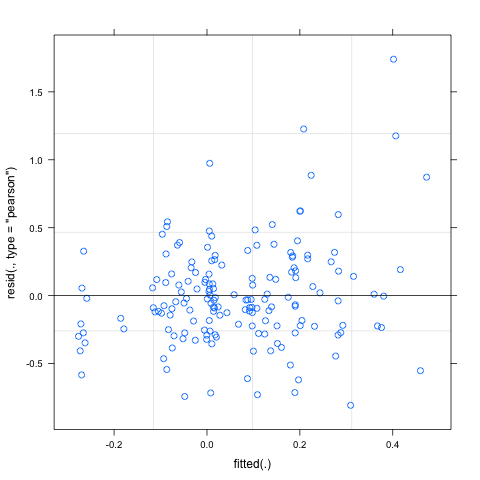

In [134]:
%%R
plot(var_model)

### Sustained Attention, liner mixed model (using R)

In [135]:
%R -i sus_lme

In [136]:
%%R

# SUSTAINED ATTENTION ###############
# Start with effects of Category, Familiarity Rating, Attention Level and all possible interactions on pupil size
# Treat participant-unique diffs as random effects (akin to repeated-measures)
sus_model <- lmer(Interp~Category*FA*AT+(1|UniqueID), data=sus_lme)

# Use AIC to determine the most parsimonious and informative model (lmerTest)
lmerTest::step(sus_model)

# Analyze this model
sus_AIC      <- lmer(Interp ~ Category + AT + (1|UniqueID) + Category:AT, data=sus_lme)
sus_anova    <- anova(sus_AIC)

sus_anova

Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
Category    2.89515 2.89515     1 375.88 12.2091 0.0005323 ***
AT          0.06395 0.06395     1 377.47  0.2697 0.6038607    
Category:AT 1.29906 1.29906     1 377.51  5.4783 0.0197742 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Sustained Attention, Post-hoc

In [137]:
%%R
summary(sus_AIC)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Interp ~ Category + AT + (1 | UniqueID) + Category:AT
   Data: sus_lme

REML criterion at convergence: 601.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4090 -0.5451 -0.1168  0.5424  4.0587 

Random effects:
 Groups   Name        Variance Std.Dev.
 UniqueID (Intercept) 0.01474  0.1214  
 Residual             0.23713  0.4870  
Number of obs: 408, groups:  UniqueID, 30

Fixed effects:
                                  Estimate Std. Error        df t value
(Intercept)                        0.14367    0.05279 155.93641   2.722
CategoryPlace                     -0.05563    0.06682 376.80483  -0.832
ATNovel_Uncued_Cat                 0.13825    0.06903 377.70844   2.003
CategoryPlace:ATNovel_Uncued_Cat  -0.22629    0.09668 377.51199  -2.341
                                 Pr(>|t|)   
(Intercept)                       0.00723 **
CategoryPlace                     0.40567   
ATNo

### Sustained Attention, Plot residuals

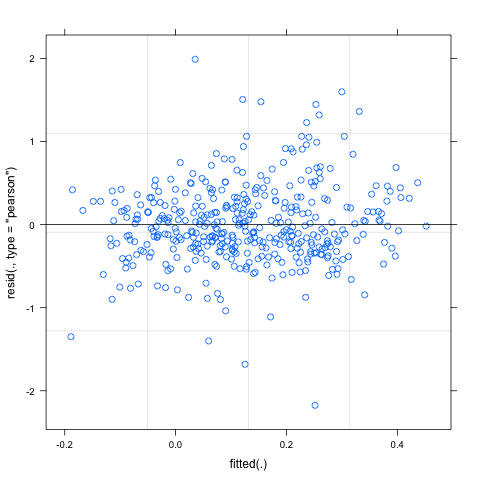

In [138]:
%%R
plot(sus_model)